# Multi-Class Classification

Till now we have seen binary classification, it's also possible to classify Multiple Classes. This can be done using One-vs-all and One-vs-One (slower) methods.

In One-vs-all we consider only one class positive and remaining classes as -1 so like this we repeat the same procedure by changing the preference and finally we evaluate their classes by their corresponding probabilities of occurances.

In [1]:
from IPython.display import Image

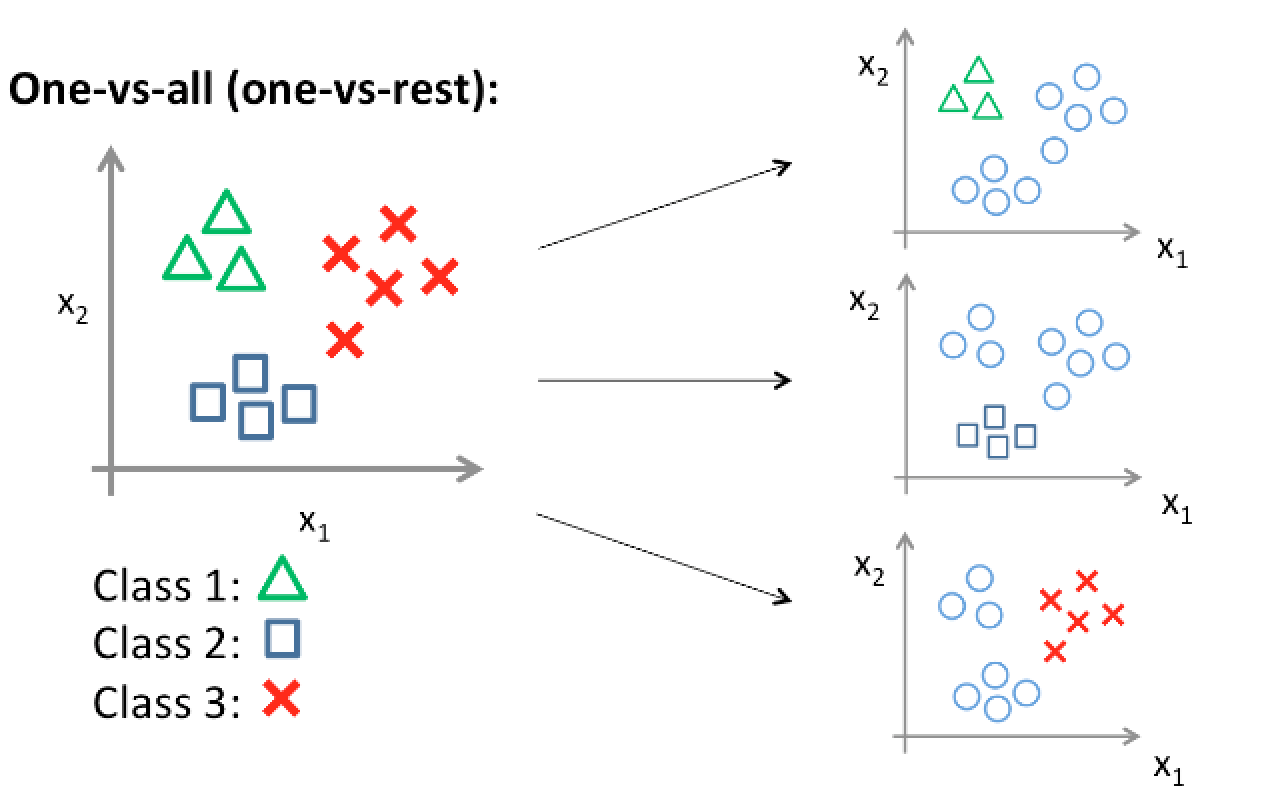

In [2]:
Image('multi-class-classification-1.png')

So therefore:

$$h_\theta^{(i)}(x) = P(y=i |x;\theta) $$ $(i=1,2,3)$

To understand this let's go with an example of Iris-Flower dataset.

In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
df = DataFrame(iris.data,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

In [8]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df['Species'] = iris.target

In [10]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
def species(x):
    d = {0:'Setosa',1:'Versicolour',2:'Virginica'}
    return d[x]

In [12]:
df['Species'] = df["Species"].apply(species)

In [13]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


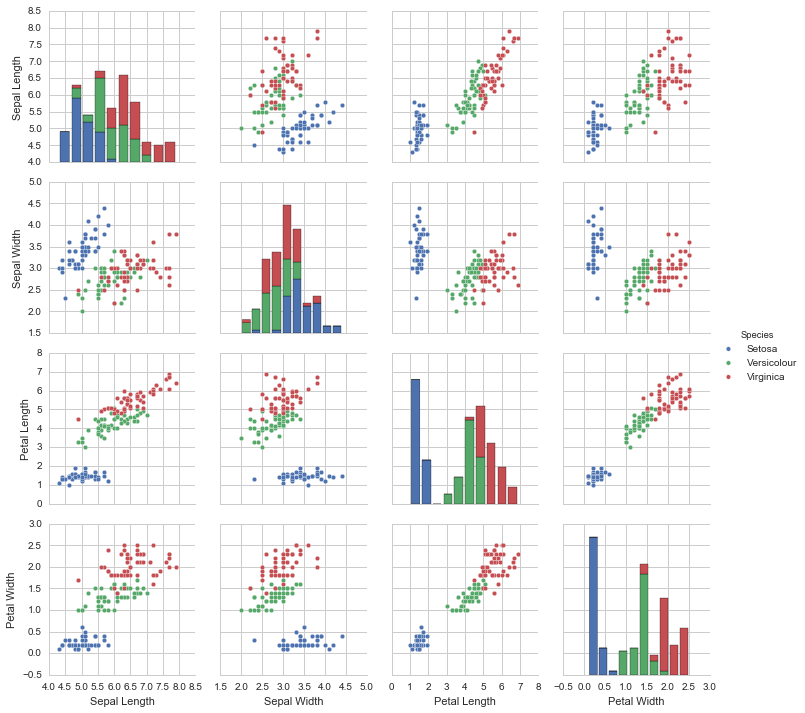

In [14]:
sns.pairplot(df,hue='Species')

Let's try with Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target)

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train,Y_train)
log_model.score(X_test,Y_test)

0.97368421052631582

Now let's go with One-vs-all or One-vs-rest classifier.

One thing to note here is that the Sklearn implements the one
versus all algorithm using the **OneVsRestClassifier** class and the one versus one
algorithm with **OneVsOneClassifier**. These are called **meta-estimators** because they
take another estimator as an input. They have the advantage of being able to permit
changing the way more than two classes are handled, and this can result in better
performance, either in terms of computational **efficiency**, or generalization error

In [18]:
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.svm import LinearSVC

In [19]:
ovr_model = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X_train,Y_train)
ovo_model = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train,Y_train)

In [20]:
#r-squared score of OneVsRestClassifier
ovr_model.score(X_test,Y_test)

0.97368421052631582

In [21]:
#r-squared score of OneVsOneClassifier
ovo_model.score(X_test,Y_test)

1.0

## K-Nearest Neighbours Classifier (lazy algorithm)

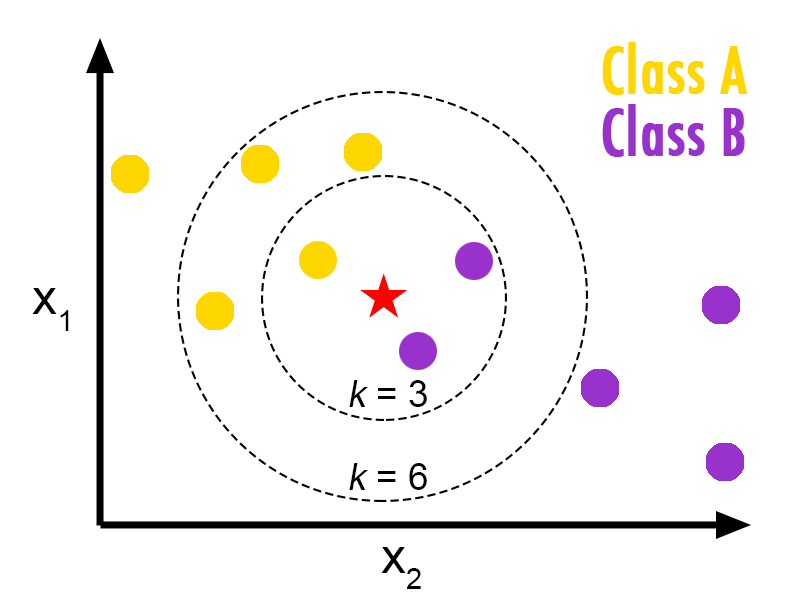

In [22]:
Image('knn-1.png')

Let's say we have $N$ vectors of $d$ dimensions.

$$(x_1,y_1)(x_2,y_2),.........,(x_n,y_n)$$
where $x \in \mathbb{R}^{d}$

$$d(x_i,x_j)^2 = ||x_i-x_j||^2 = \sum_{k=1}^d (x_{ik}-x_{jkk})^2$$

where $x_i = (x_i1,x_i2,....,x_id)$

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)

0.97368421052631582

In [25]:
accuracy = []
for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    accuracy.append(knn.score(X_test,Y_test))

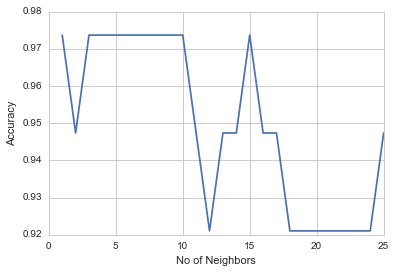

In [26]:
plt.plot(range(1,26),accuracy)
plt.xlabel('No of Neighbors')
plt.ylabel('Accuracy')

#### Diving deeper

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2).fit(X)
distances, indices = nbrs.kneighbors(X)
print distances

[[ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.41421356]
 [ 0.          1.        ]
 [ 0.          1.        ]
 [ 0.          1.41421356]]


In [29]:
print indices

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
